In [1]:
# %matplotlib notebook
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats as sps

from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap

# customer palette for visulization color code
customer_palette = sns.color_palette('Set1', 5)
customer_palette.append(sns.xkcd_palette(['greyish'])[0])
cmap = ListedColormap(['silver','crimson', 'deepskyblue','green','purple','orange'])

In [13]:
inputfile = '/data/maxim/covid/monday/new.csv'
columns = ['packets', 'bytes', 'start','end', 'srcaddr',
            'destaddr','srcport','destport', 'protocol']
use = ['packets', 'bytes','start','end']
df = pd.read_csv(inputfile, names=columns, usecols=use,nrows=20000000)
df['duration'] = df['end'] - df['start']
df = df.drop(['start', 'end'], axis=1)
#df['label'] = -1
#target_order = [0,1,2,3,4,-1]
#df = df.loc[(df['srcport'] != 0) & (df['destport'] != 0)]


In [2]:
inputfile = '/data/maxim/covid/monday/new.csv'
columns = ['packets', 'bytes', 'start', 'end', 'srcaddr',
            'destaddr','srcport','destport', 'protocol']
use = ['packets','bytes', 'start', 'end', 'protocol', 'srcport', 'destport']
df = pd.read_csv(inputfile, names=columns, nrows = 40000000, usecols=use)
import dask.dataframe as dd
df = dd.read_csv(inputfile,names=columns, usecols=use)
df['duration'] = df['end'] - df['start']
df = df.drop(['start', 'end'], axis=1)
df = df.compute()


In [3]:
var = df.loc[:,['bytes', 'duration', 'packets']]
var.loc[var['duration'] == 0] = 0.1
min_max_scaler = MinMaxScaler()
var_minmax = min_max_scaler.fit_transform(var)

In [4]:
var = df.loc[:,['bytes', 'duration', 'packets', 'protocol']]
var['protocol'].value_counts()[:5].index.tolist()

[6, 17, 1, 50, 89]

Text(0, 0.5, 'log(quantity)')

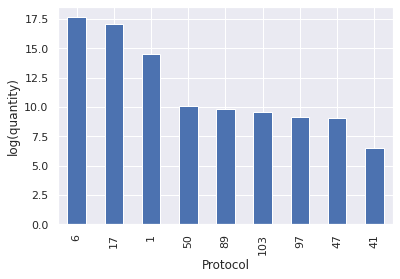

In [9]:
np.log(df['protocol'].value_counts()).plot(kind='bar');
plt.xlabel("Protocol")
plt.ylabel("log(quantity)")

[Text(0.5, 0, 'quantity')]

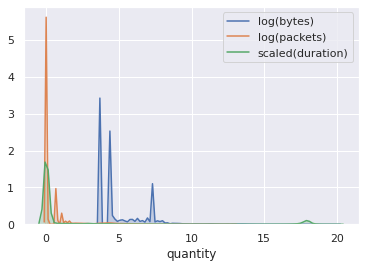

In [14]:
ax = sns.kdeplot(np.log(df['bytes']), bw = 0.001, shade=True, label = 'log(bytes)');
sns.kdeplot(np.log(df['packets']), shade=True, label = 'log(packets)');
sns.kdeplot(df['duration']/3500, shade=True, label = 'scaled(duration)');
ax.set(xlabel='quantity')

In [3]:
ax

NameError: name 'ax' is not defined

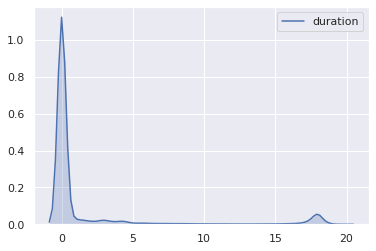

In [47]:
sns.kdeplot(var['duration']/3500, shade=True);

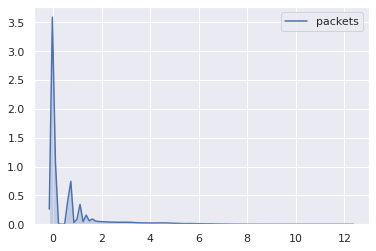

In [38]:
sns.kdeplot(np.log(var['packets']), bw=.05, shade=True);

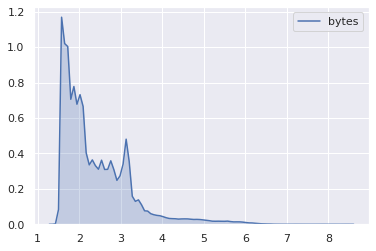

In [39]:
sns.kdeplot(np.log10(var['bytes']), bw=.05, shade=True);

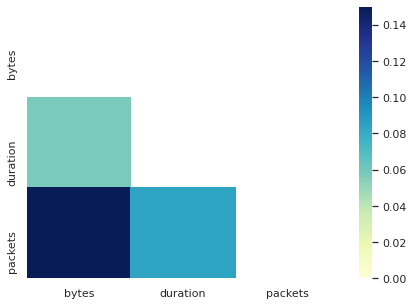

In [43]:
var = df.loc[:,['bytes', 'duration', 'packets']]
corr = var.corr()
cov = var.cov()
vbytes = var['bytes']
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.15, vmin=0, cmap="YlGnBu")


In [ ]:
with sns.axes_style("darkgrid"):
    sns.jointplot(x=np.log(var['bytes']), y=np.log(var['packets']), kind="hex", color="k");

In [ ]:
var.loc[var['duration'] == 0] = 0.1
with sns.axes_style("white"):
    sns.jointplot(x=var['duration'], y=np.log(var['bytes']), kind="hex", color="b");

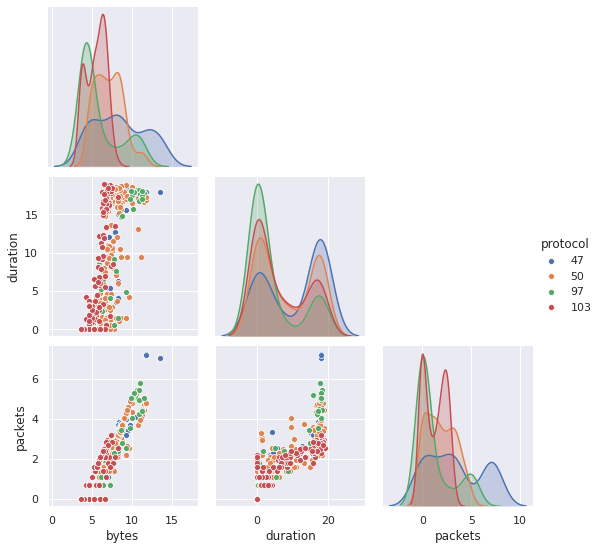

In [98]:
var = df.loc[:,['bytes', 'duration', 'packets', 'protocol']]
prot = var['protocol'].value_counts()[:8].index.tolist()
prot.remove(1)
prot.remove(6)
prot.remove(89)
prot.remove(17)
var = var.loc[var['protocol'].isin(prot)]

x = var

x['bytes'] = np.log(var['bytes'])
x['packets'] = np.log(var['packets'])
x['duration'] = var['duration']/3500

sns.pairplot(x, hue="protocol", corner=True);

In [53]:
var = df.loc[:,['bytes', 'duration', 'packets', 'protocol']]
var['protocol'].value_counts().index.tolist()

[6, 17, 1, 50, 89, 103, 97, 47, 41]

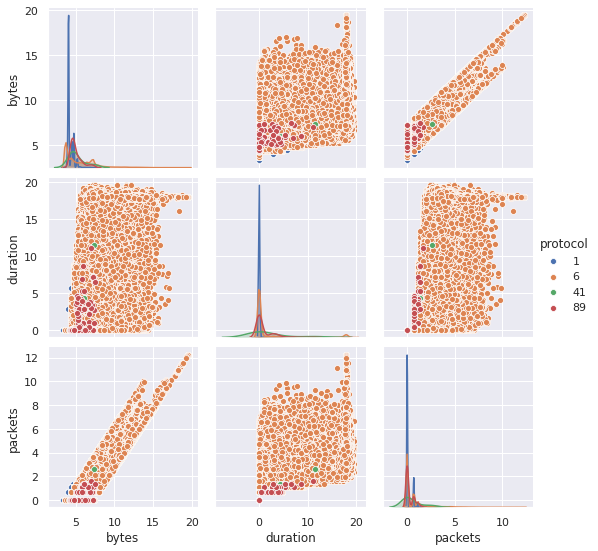

In [118]:
var = df.loc[:,['bytes', 'duration', 'packets', 'protocol']]
prot = var['protocol'].value_counts()[:6].index.tolist()

l = [6, 1, 89, 41]
var = var.loc[var['protocol'].isin(l)]

x = var

x['bytes'] = np.log(var['bytes'])
x['packets'] = np.log(var['packets'])
x['duration'] = var['duration']/3500

sns.pairplot(x, hue="protocol");




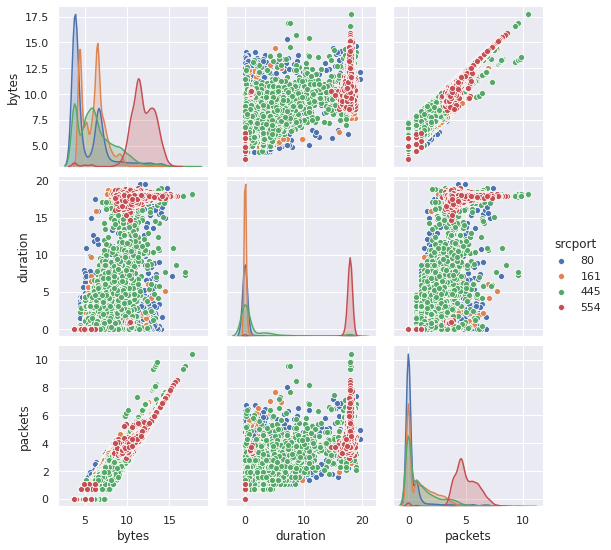

In [100]:
var = df.loc[:,['bytes', 'duration', 'packets', 'srcport']]
srcp = var['srcport'].value_counts()[:9].index.tolist()
srcp.remove(0)
srcp.remove(5246)
srcp.remove(53)
srcp.remove(161)
srcp.remove(443)
srcp.reverse()
l = [ 161, 554, 445, 80]
var = var.loc[var['srcport'].isin(l)]

x = var

x['bytes'] = np.log(var['bytes'])
x['packets'] = np.log(var['packets'])
x['duration'] = var['duration']/3500
sns.pairplot(x, hue="srcport");

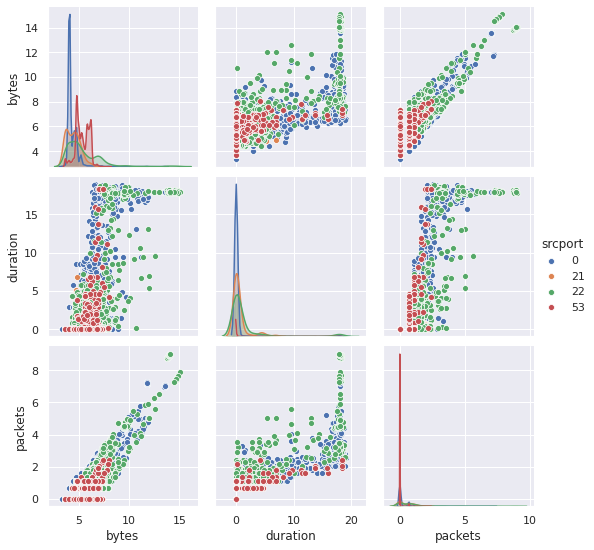

In [99]:
var = df.loc[:,['bytes', 'duration', 'packets', 'srcport']]
srcp = var['srcport'].value_counts()[:6].index.tolist()
l = [0, 53, 22, 21]
var = var.loc[var['srcport'].isin(l)]

x = var

x['bytes'] = np.log(var['bytes'])
x['packets'] = np.log(var['packets'])
x['duration'] = var['duration']/3500

sns.pairplot(x, hue="srcport");

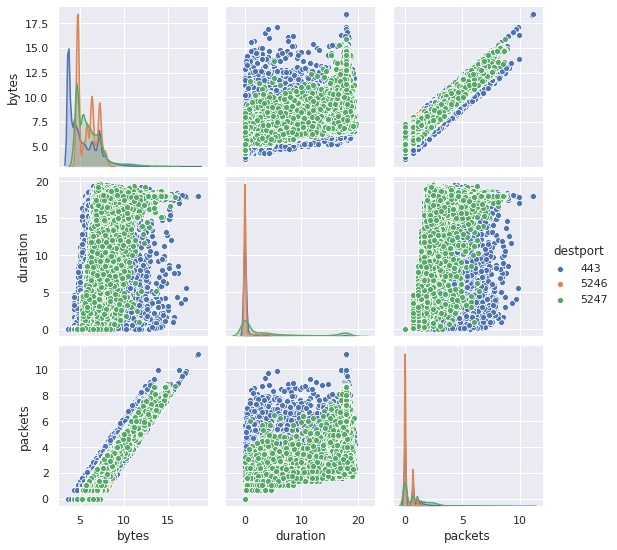

In [104]:
var = df.loc[:,['bytes', 'duration', 'packets', 'destport']]
destp = var['destport'].value_counts()[:6].index.tolist()
destp.remove(53)
destp.remove(0)
destp.remove(80)
var = var.loc[var['destport'].isin(destp)]

x = var

x['bytes'] = np.log(var['bytes'])
x['packets'] = np.log(var['packets'])
x['duration'] = var['duration']/3500
sns.pairplot(x, hue="destport");

In [ ]:
df['protocol'].value_counts()[:5].index.tolist()